In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10951,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967256e+07,1.967256e+07,False,NaN,1,NaN,NaN,None,2024-04-04T02:24:00.000Z,65838.049141,3.159667e+10,-40.0912,-0.703476,0.024193,-5.200765,-3.654875,52.970263,51.589449,1.295203e+12,52.1133,1.382599e+12,None,2024-04-04T02:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-03 22:25:51.158606
1,1027,Ethereum,ETH,ethereum,8717,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200693e+08,1.200693e+08,True,NaN,2,NaN,NaN,None,2024-04-04T02:23:00.000Z,3304.600329,1.432970e+10,-38.6009,-0.812217,0.120995,-5.632319,-9.037476,43.382438,47.219910,3.967810e+11,15.9651,3.967810e+11,None,2024-04-04T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-03 22:25:51.158606
2,825,Tether USDt,USDT,tether,81166,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.061498e+11,1.099426e+11,True,NaN,3,NaN,NaN,None,2024-04-04T02:23:00.000Z,1.000423,6.639797e+10,-34.2295,0.016186,0.020076,0.107056,-0.141724,0.074681,-0.059667,1.061947e+11,4.2729,1.099891e+11,None,2024-04-04T02:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-03 22:25:51.158606
3,1839,BNB,BNB,bnb,2130,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495355e+08,1.495355e+08,False,NaN,4,NaN,NaN,None,2024-04-04T02:23:00.000Z,568.999136,2.010635e+09,-21.9126,-0.278705,2.488444,-2.877650,35.593504,89.394182,75.641676,8.508556e+10,3.4236,8.508556e+10,None,2024-04-04T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-03 22:25:51.158606
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.448143e+08,5.731971e+08,True,NaN,5,NaN,NaN,None,2024-04-04T02:23:00.000Z,184.027199,3.914492e+09,-18.7153,-1.169535,-0.732711,0.213016,41.091248,87.043691,81.191209,8.185792e+10,3.2937,1.054839e+11,None,2024-04-04T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-03 22:25:51.158606
5,3408,USDC,USDC,usd-coin,17858,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.287308e+10,3.287308e+10,False,NaN,6,NaN,NaN,None,2024-04-04T02:23:00.000Z,0.999923,9.417922e+09,-26.5781,0.006407,-0.006271,-0.016864,-0.009760,-0.017758,0.001365,3.287056e+10,1.3226,3.287056e+10,None,2024-04-04T02:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-03 22:25:51.158606
6,52,XRP,XRP,xrp,1280,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.494240e+10,9.998774e+10,False,NaN,7,NaN,NaN,None,2024-04-04T02:24:00.000Z,0.571851,1.472857e+09,-36.0883,-1.081645,-1.992303,-6.376918,-13.437723,10.320581,-0.447675,3.141886e+10,1.2642,5.718510e+10,None,2024-04-04T02:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-03 22:25:51.158606
7,74,Dogecoin,DOGE,dogecoin,942,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.437410e+11,1.437410e+11,True,NaN,8,NaN,NaN,None,2024-04-04T02:24:00.000Z,0.175717,2.640405e+09,-38.5256,-2.316901,-4.680814,-12.452606,-11.159822,122.857392,111.768099,2.525768e+10,1.0163,2.525768e+10,None,2024-04-04T02:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-03 22:25:51.158606
8,2010,Cardano,ADA,cardano,1121,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner completed")
    sleep(60)
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10951,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967340e+07,1.967340e+07,False,NaN,1,NaN,NaN,None,2024-04-05T02:41:00.000Z,67590.604722,3.488805e+10,9.4642,-0.619580,2.860429,-4.422090,6.671667,59.389768,53.723812,1.329737e+12,52.6229,1.419403e+12,None,2024-04-05T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
1,1027,Ethereum,ETH,ethereum,8723,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201192e+08,1.201192e+08,True,NaN,2,NaN,NaN,None,2024-04-05T02:40:00.000Z,3261.936637,1.469966e+10,1.0077,-1.018930,-0.627408,-8.482149,-7.664431,43.152403,44.390026,3.918211e+11,15.5059,3.918211e+11,None,2024-04-05T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
2,825,Tether USDt,USDT,tether,81273,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.066015e+11,1.099426e+11,True,NaN,3,NaN,NaN,None,2024-04-05T02:40:00.000Z,0.999920,6.933017e+10,3.4937,-0.051187,-0.045816,-0.019283,-0.074836,0.063773,-0.096482,1.065929e+11,4.2183,1.099338e+11,None,2024-04-05T02:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-04 22:42:25.592246
3,1839,BNB,BNB,bnb,2130,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495354e+08,1.495354e+08,False,NaN,4,NaN,NaN,None,2024-04-05T02:40:00.000Z,576.275934,2.266333e+09,6.7722,-1.790246,-0.684960,-1.902490,48.310348,90.067833,86.067338,8.617363e+10,3.4102,8.617363e+10,None,2024-04-05T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.449298e+08,5.733576e+08,True,NaN,5,NaN,NaN,None,2024-04-05T02:40:00.000Z,179.083574,4.007922e+09,1.7843,-1.645925,-2.559307,-5.457034,47.460097,88.759496,80.685553,7.967962e+10,3.1532,1.026789e+11,None,2024-04-05T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
5,3408,USDC,USDC,usd-coin,17887,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.301195e+10,3.301195e+10,False,NaN,6,NaN,NaN,None,2024-04-05T02:40:00.000Z,1.000057,1.175935e+10,24.0923,0.013462,0.004363,0.009624,0.022093,-0.004234,0.000472,3.301382e+10,1.3127,3.301382e+10,None,2024-04-05T02:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-04 22:42:25.592246
6,52,XRP,XRP,xrp,1280,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,7,NaN,NaN,None,2024-04-05T02:41:00.000Z,0.582621,2.168330e+09,44.9597,-0.661882,2.439753,-6.296125,0.189678,15.990944,1.574919,3.207418e+10,1.2693,5.826208e+10,None,2024-04-05T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
7,74,Dogecoin,DOGE,dogecoin,942,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.437545e+11,1.437545e+11,True,NaN,8,NaN,NaN,None,2024-04-05T02:41:00.000Z,0.174828,2.074090e+09,-21.5780,-1.253892,0.042024,-17.966785,16.578285,125.123319,112.315228,2.513235e+10,0.9946,2.513235e+10,None,2024-04-05T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
8,2010,Cardano,ADA,cardano,1121,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.5

In [10]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10951,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19673400.00000,19673400.00000,False,NaN,1,NaN,NaN,None,2024-04-05T02:41:00.000Z,67590.60472,34888045107.49850,9.46420,-0.61958,2.86043,-4.42209,6.67167,59.38977,53.72381,1329737002936.84888,52.62290,1419402699160.98999,None,2024-04-05T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
1,1027,Ethereum,ETH,ethereum,8723,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120119167.62412,120119167.62412,True,NaN,2,NaN,NaN,None,2024-04-05T02:40:00.000Z,3261.93664,14699661780.67603,1.00770,-1.01893,-0.62741,-8.48215,-7.66443,43.15240,44.39003,391821113696.76019,15.50590,391821113696.76001,None,2024-04-05T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
2,825,Tether USDt,USDT,tether,81273,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,106601457935.07361,109942615136.74486,True,NaN,3,NaN,NaN,None,2024-04-05T02:40:00.000Z,0.99992,69330170535.87061,3.49370,-0.05119,-0.04582,-0.01928,-0.07484,0.06377,-0.09648,106592902595.60826,4.21830,109933791651.47000,None,2024-04-05T02:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-04 22:42:25.592246
3,1839,BNB,BNB,bnb,2130,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149535359.11394,149535359.11394,False,NaN,4,NaN,NaN,None,2024-04-05T02:40:00.000Z,576.27593,2266332793.36642,6.77220,-1.79025,-0.68496,-1.90249,48.31035,90.06783,86.06734,86173628762.99170,3.41020,86173628762.99001,None,2024-04-05T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,444929831.92379,573357623.31480,True,NaN,5,NaN,NaN,None,2024-04-05T02:40:00.000Z,179.08357,4007922482.55345,1.78430,-1.64592,-2.55931,-5.45703,47.46010,88.75950,80.68555,79679624524.13475,3.15320,102678932420.06000,None,2024-04-05T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
5,3408,USDC,USDC,usd-coin,17887,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33011952586.66092,33011952586.66092,False,NaN,6,NaN,NaN,None,2024-04-05T02:40:00.000Z,1.00006,11759354026.96023,24.09230,0.01346,0.00436,0.00962,0.02209,-0.00423,0.00047,33013821442.45760,1.31270,33013821442.46000,None,2024-04-05T02:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-04 22:42:25.592246
6,52,XRP,XRP,xrp,1280,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,7,NaN,NaN,None,2024-04-05T02:41:00.000Z,0.58262,2168330047.55595,44.95970,-0.66188,2.43975,-6.29612,0.18968,15.99094,1.57492,32074175852.84698,1.26930,58262076473.87000,None,2024-04-05T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 22:42:25.592246
7,74,Dogecoin,DOGE,dogecoin,942,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143754546383.70526,143754546383.70526,True,NaN,8,NaN,NaN,None,2024-04-05T02:41:00.000Z,0.17483,2074090021.22904,-21.57800,-1.25389,0.04202,-17.96678,16.57829,125.12332,112.31523,25132345626.33451,0.99460,25132345626.33000,None,2024-04-05T02:41:00.000Z,NaN,N

In [11]:
# grouping data by change in $ over time. 
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.61958,2.86043,-4.42209,6.67167,59.38977,53.72381
Ethereum,-1.01893,-0.62741,-8.48215,-7.66443,43.15240,44.39003
Tether USDt,-0.05119,-0.04582,-0.01928,-0.07484,0.06377,-0.09648
BNB,-1.79025,-0.68496,-1.90249,48.31035,90.06783,86.06734
Solana,-1.64592,-2.55931,-5.45703,47.46010,88.75950,80.68555
USDC,0.01346,0.00436,0.00962,0.02209,-0.00423,0.00047
XRP,-0.66188,2.43975,-6.29612,0.18968,15.99094,1.57492
Dogecoin,-1.25389,0.04202,-17.96678,16.57829,125.12332,112.31523
Cardano,-0.95465,0.41274,-11.26415,-15.04975,16.29708,6.60140


In [13]:
# rearranging data in order to visualize
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.61958
              quote.USD.percent_change_24h     2.86043
              quote.USD.percent_change_7d     -4.42209
              quote.USD.percent_change_30d     6.67167
              quote.USD.percent_change_60d    59.38977
              quote.USD.percent_change_90d    53.72381
Ethereum      quote.USD.percent_change_1h     -1.01893
              quote.USD.percent_change_24h    -0.62741
              quote.USD.percent_change_7d     -8.48215
              quote.USD.percent_change_30d    -7.66443
              quote.USD.percent_change_60d    43.15240
              quote.USD.percent_change_90d    44.39003
Tether USDt   quote.USD.percent_change_1h     -0.05119
              quote.USD.percent_change_24h    -0.04582
              quote.USD.percent_change_7d     -0.01928
              quote.USD.percent_change_30d    -0.07484
              quote.USD.percent_change_60d     0.06377
              quote.US

In [14]:
# converting df4 into a dataframe
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.61958
             quote.USD.percent_change_24h   2.86043
             quote.USD.percent_change_7d   -4.42209
             quote.USD.percent_change_30d   6.67167
             quote.USD.percent_change_60d  59.38977
             quote.USD.percent_change_90d  53.72381
Ethereum     quote.USD.percent_change_1h   -1.01893
             quote.USD.percent_change_24h  -0.62741
             quote.USD.percent_change_7d   -8.48215
             quote.USD.percent_change_30d  -7.66443
             quote.USD.percent_change_60d  43.15240
             quote.USD.percent_change_90d  44.39003
Tether USDt  quote.USD.percent_change_1h   -0.05119
             quote.USD.percent_change_24h  -0.04582
             quote.USD.percent_change_7d   -0.01928
             quote.USD.percent_change_30d  -0.07484
             quote.USD.percent_change_60d   0.06377
             quote.USD.percent_change_90d  -0.09648
BNB          quote.USD.percent_change_1h   -1.79025
             quote.USD.percent_change_24h  -0.68496
             quote.USD.percent_change_7d   -1.90249
             quote.USD.percent_change_30d  48.31035
             quote.USD.percent_change_60d  90.06783
             quote.USD.percent_change_90d  86.06734
Solana       quote.USD.percent_change_1h   -1.64592
             quote.USD.percent_change_24h  -2.55931
             quote.USD.percent_change_7d   -5.45703
             quote.USD.percent_change_30d  47.46010
             quote.USD.percent_change_60d  88.75950
             quote.USD.percent_change_90d  80.68555
USDC         quote.USD.percent_change_1h    0.01346
             quote.USD.percent_change_24h   0.00436
             quote.USD.percent_change_7d    0.00962
             quote.USD.percent_change_30d   0.02209
             quote.USD.percent_change_60d  -0.00423
             quote.USD.percent_change_90d   0.00047
XRP          quote.USD.percent_change_1h   -0.66188
             quote.USD.percent_change_24h   2.43975
             quote.USD.percent_change_7d   -6.29612
             quote.USD.percent_change_30d   0.18968
             quote.USD.percent_change_60d  15.99094
             quote.USD.percent_change_90d   1.57492
Dogecoin     quote.USD.percent_change_1h   -1.25389
             quote.USD.percent_change_24h   0.04202
             quote.USD.percent_change_7d  -17.96678
             quote.USD.percent_change_30d  16.57829
             quote.USD.percent_change_60d 125.12332
             quote.USD.percent_change_90d 112.31523
Cardano      quote.USD.percent_change_1h   -0.95465
             quote.USD.percent_change_24h   0.41274
             quote.USD.percent_change_7d  -11.26415
             quote.USD.percent_change_30d -15.04975
             quote.USD.percent_change_60d  16.29708
             quote.USD.percent_change_90d   6.60140
Toncoin      quote.USD.percent_change_1h   -0.30919
             quote.USD.percent_change_24h   3.27493
             quote.USD.percent_change_7d    4.30775
             quote.USD.percent_change_30d  96.78480
             quote.USD.percent_change_60d 150.04473
             quote.USD.percent_change_90d 144.16873
Avalanche    quote.USD.percent_change_1h   -1.27858
             quote.USD.percent_change_24h  -1.38682
             quote.USD.percent_change_7d  -16.07746
             quote.USD.percent_change_30d  18.65039
             quote.USD.percent_change_60d  30.26629
             quote.USD.percent_change_90d  26.90270
Shiba Inu    quote.USD.percent_change_1h   -1.44257
             quote.USD.percent_change_24h   2.37977
             quote.USD.percent_change_7d  -13.43331
             quote.USD.percent_change_30d -17.03513
             quote.USD.percent_change_60d 202.58047
             quote.USD.percent_change_90d 174.61667
Bitcoin Cash quote.USD.percent_change_1h    0.94084
             quote.USD.percent_change_24h  10.04158
             quote.USD.percent_change_7d   19.92352
             quote.USD.percent_change_30d

In [15]:
# assigning an index number to our values
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.61958
1,Bitcoin,quote.USD.percent_change_24h,2.86043
2,Bitcoin,quote.USD.percent_change_7d,-4.42209
3,Bitcoin,quote.USD.percent_change_30d,6.67167
4,Bitcoin,quote.USD.percent_change_60d,59.38977
5,Bitcoin,quote.USD.percent_change_90d,53.72381
6,Ethereum,quote.USD.percent_change_1h,-1.01893
7,Ethereum,quote.USD.percent_change_24h,-0.62741
8,Ethereum,quote.USD.percent_change_7d,-8.48215
9,Ethereum,quote.USD.percent_change_30d,-7.66443


In [18]:
# renaming column
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.61958
1,Bitcoin,quote.USD.percent_change_24h,2.86043
2,Bitcoin,quote.USD.percent_change_7d,-4.42209
3,Bitcoin,quote.USD.percent_change_30d,6.67167
4,Bitcoin,quote.USD.percent_change_60d,59.38977
5,Bitcoin,quote.USD.percent_change_90d,53.72381
6,Ethereum,quote.USD.percent_change_1h,-1.01893
7,Ethereum,quote.USD.percent_change_24h,-0.62741
8,Ethereum,quote.USD.percent_change_7d,-8.48215
9,Ethereum,quote.USD.percent_change_30d,-7.66443


In [23]:
# renaming the values in percent_change
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

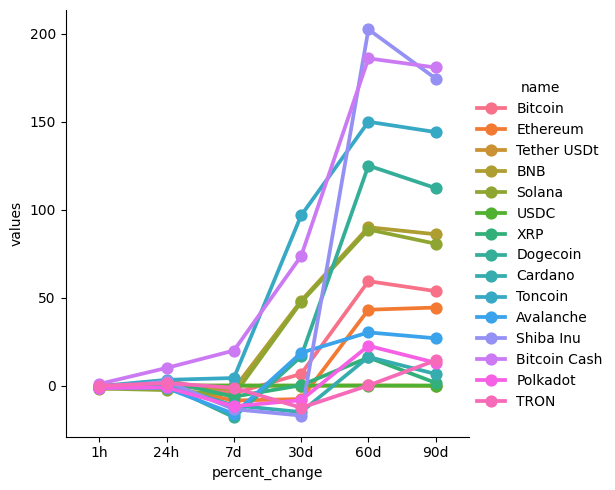

In [24]:
# visualizing data with line graph
sns.catplot(x='percent_change',y='values', hue='name', data=df7, kind='point')